# Predicting Covid19 Hospitalization

In this study, I'm going to cover the following: 

* Introducing the case study 
* Preprocessing the data 
* Analyzing the data



# Introducing the case study

As the world started grappling with the ramifications of COVID-19, healthcare systems across the globe started dealing with the new overwhelming burden of caring for the people infected with the disease. For instance, in the US governments, all levels – Federal, State, and local, had to make decisions so they can help the hospitals as they struggled to shoulder the crisis. 

In this case study, I'm going to focus on the government of Los Angeles County (LA), California. This county is the most populated in the US, with approximately 10 million residents. I'm going to use historical data to predict the number of patients that will need hospitalization in the near future; specifically, I will create a model that can predict the number of hospitalizations in LA County two weeks from the present moment.


# Introducing the source of data

In this study, our target is the number of hospitalizations. In other words, we want to imagine what the independent attributes could be for predicting this specific dependent attribute.

The following list shows four sources of data that can be useful for predicting hospitalizations: 
* Historical data of LA County COVID-19 hospitalizations (https://data.chhs.ca.gov/dataset/covid-19-hospital-data) 
* Historical data of COVID-19 Cases and Deaths in LA County (https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state) 
* Historical data of COVID-19 Vaccinations in LA County (https://data.chhs.ca.gov/dataset/covid-19-vaccine-progress-dashboard-data-by-zip-code) 
* The dates of US public holidays (these can be accessed via Google)


# Import Libraries

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings("ignore")

# Loading data

In [100]:
day_hosp_df = pd.read_csv('covid19hospitalbycounty.csv')
day_hosp_df

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Glenn,2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,El Dorado,2020-03-29,0.0,6.0,NaN,NaN,0.0,3.0,3.0
2,Placer,2020-03-29,18.0,14.0,NaN,NaN,4.0,1.0,10.0
3,Contra Costa,2020-03-29,23.0,62.0,NaN,NaN,8.0,15.0,62.0
4,Inyo,2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
55432,Kings,2022-12-13,5.0,0.0,5.0,108.0,0.0,0.0,2.0
55433,Santa Barbara,2022-12-13,47.0,1.0,48.0,604.0,8.0,1.0,19.0
55434,San Benito,2022-12-13,4.0,0.0,4.0,25.0,2.0,0.0,0.0
55435,Merced,2022-12-13,15.0,0.0,15.0,273.0,2.0,0.0,4.0


In [101]:
day_case_df = pd.read_csv('covid19cases_test.csv')
day_case_df

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63496,2022-12-03,Yuba,County,79290.0,8.0,19387.0,0.0,121.0,95.0,200889,9.0,22709,0.0,19307.0,0.0,132.0,NaN
63497,2022-12-04,Yuba,County,79290.0,3.0,19390.0,0.0,121.0,91.0,200980,6.0,22715,0.0,19307.0,0.0,132.0,NaN
63498,2022-12-05,Yuba,County,79290.0,5.0,19395.0,0.0,121.0,87.0,201067,5.0,22720,0.0,19307.0,0.0,132.0,NaN
63499,2022-12-06,Yuba,County,79290.0,0.0,19395.0,0.0,121.0,NaN,201067,NaN,22720,92.0,19399.0,0.0,132.0,1217.0


In [102]:
day_case_df = day_case_df[day_case_df.date.notna()]

In [103]:
day_case_df

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
0,2020-02-01,Alameda,County,1685886.0,3.0,3.0,0.0,0.0,4.0,4,0.0,0,0.0,0.0,0.0,0.0,NaN
1,2020-02-02,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
2,2020-02-03,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
3,2020-02-04,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,0.0,5,0.0,0,0.0,0.0,0.0,0.0,NaN
4,2020-02-05,Alameda,County,1685886.0,0.0,3.0,0.0,0.0,1.0,6,0.0,0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63495,2022-12-02,Yuba,County,79290.0,15.0,19379.0,0.0,121.0,166.0,200794,18.0,22700,0.0,19307.0,0.0,132.0,NaN
63496,2022-12-03,Yuba,County,79290.0,8.0,19387.0,0.0,121.0,95.0,200889,9.0,22709,0.0,19307.0,0.0,132.0,NaN
63497,2022-12-04,Yuba,County,79290.0,3.0,19390.0,0.0,121.0,91.0,200980,6.0,22715,0.0,19307.0,0.0,132.0,NaN
63498,2022-12-05,Yuba,County,79290.0,5.0,19395.0,0.0,121.0,87.0,201067,5.0,22720,0.0,19307.0,0.0,132.0,NaN


In [104]:
day_vax_df = pd.read_csv('covid19vaccinesbyzipcode_test.csv')
day_vax_df

,as_of_date,zip_code_tabulation_area,local_health_jurisdiction,county,vaccine_equity_metric_quartile,vem_source,age12_plus_population,age5_plus_population,tot_population,persons_fully_vaccinated,persons_partially_vaccinated,percent_of_population_fully_vaccinated,percent_of_population_partially_vaccinated,percent_of_population_with_1_plus_dose,booster_recip_count,bivalent_dose_recip_count,eligible_recipient_count,redacted
0,2021-01-05,91001,Los Angeles,Los Angeles,3.0,Healthy Places Index Score,32812.9,35803,37818.0,17.0,691.0,0.000450,0.018272,0.018722,NaN,NaN,17,Information redacted in accordance with CA sta...
1,2021-01-05,94930,Marin,Marin,4.0,Healthy Places Index Score,7851.1,8362,8728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Information redacted in accordance with CA sta...
2,2021-01-05,93222,Kern,Kern,2.0,Healthy Places Index Score,1453.9,1524,1583.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Information redacted in accordance with CA sta...
3,2021-01-05,94903,Marin,Marin,4.0,Healthy Places Index Score,26736.7,29180,30427.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Information redacted in accordance with CA sta...
4,2021-01-05,93234,Fresno,Fresno,1.0,Healthy Places Index Score,5476.8,6517,7355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Information redacted in accordance with CA sta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179923,2022-12-13,93530,Inyo,Inyo,NaN,No VEM Assigned,10.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,Information redacted in accordance with CA sta...
179924,2022-12-13,94611,Alameda,Alameda,4.0,Healthy Places Index Score,34348.5,37110,38975.0,36687.0,2578.0,0.941296,0.066145,1.000000,30295.0,17811.0,35759,No
179925,2022-12-13,93552,Los Angeles,Los Angeles,1.0,Healthy Places Index Score,32533.5,37174,39905.0,27926.0,2473.0,0.699812,0.061972,0.761784,13689.0,3001.0,27845,No
179926,2022-12-13,94607,Alameda,Alameda,2.0,Healthy Places Index Score,23966.5,25627,26823.0,21818.0,2018.0,0.813406,0.075234,0.888640,14734.0,5867.0,21632,No


As discussed, our goal in this case study is to make a prediction for two full weeks (that is, 14 days) in the future.

The next step is to design a dataset that has two characteristics: 
* First, it must support our prediction needs. For instance, in this case, we want to use historical data to predict hospitalizations in two weeks. 
* Second, the dataset must be filled with all of the data we have collected. In this example, the data includes **covid19hospitalbycounty.csv**, **covid19cases_test.csv**, **covid19vaccinesbyzipcode_test.csv**, and the dates of US public holidays.


# Designing the dataset to support the prediction

From the previous datasets I come up with a list of potential independent attributes for the prediction. In defining the attributes in the following list, I have used the **t** variable to represent time. For instance, **t0** shows **t=0**, and the attribute shows information about the same day as the row:

* **n_Hosp_t0**: The number of hospitalizations at t=0
* **s_Hosp_tn7_0**: The slope of the curve of hospitalizations for the period t=-7 to t=0 
* **av7_Case_tn6_0**: The seven-day average of the number of cases for the period t=-6 to t=0 
* **s_Case_tn14_0**: The slope of the curve of cases for the period t=-14 to t=0 
* **av7_Death_tn6_0**: The seven-day average of the number of deaths for the period t=-6 to t=0 
* **s_Death_tn14_0**: The slope of the curve of deaths for the period t=-14 to t=0 
* **p_FullVax_t0**: The percentage of fully vaccinated people at t=0 
* **s_FullVax_tn14_0**: The slope of the curve of the percentage of fully vaccinated people for the period t=-14 to t=0
* **n_days_MajHol**: The number of days from the previous major holiday 

The dependent attribute (or our target) is also coded similarly as **n_Hosp_t14**, which is the number of hospitalizations at t=14.


In [105]:
# creating a placeholder dataset:

day_df = pd.DataFrame(index = range(len(day_hosp_df.todays_date.unique())),
             columns=['t0','n_Hosp_t0','s_Hosp_tn7_0',
                              'n_days_MajHol',
                               'av7_Case_tn6_0','s_Case_tn14_0',
                               'av7_Death_tn6_0','s_Death_tn14_0',
                               'p_FullVax_t0','s_FullVax_tn14_0',
                               'n_Hosp_t14'])

In [106]:
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that I created the placeholder dataset, I will be using the data from the four sources to fill the columns, one by one, in the designed placeholder dataset. However, to make the connections between the data sources, some data cleaning is needed. The main priority is to make sure all of the rows in day_hosp_df, day_case_df, day_vax_df, and even the placeholder day_df are indexed with the datetime version of the dates. These dates will provide seamless connections between the data sources.


In [107]:
day_df.t0 = pd.to_datetime(day_hosp_df.todays_date.unique(),format="%Y-%m-%d")

In [108]:
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
0,2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
985,2022-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,2022-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,2022-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,2022-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# converting the date column to timedate
day_hosp_df.todays_date = pd.to_datetime(day_hosp_df.todays_date, format="%Y-%m-%d")
# setting the date as index 
day_hosp_df.set_index('todays_date', drop=False, inplace=True)

In [110]:
# converting the date column to timedate
day_case_df.date  = pd.to_datetime(day_case_df.date, format="%Y-%m-%d")
# setting the date as index 
day_case_df.set_index('date',drop=False,inplace=True)

In [111]:
# Keeping only 'Los Angeles' County
BM = day_case_df.area == 'Los Angeles'
day_case_df = day_case_df[BM]
day_case_df

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
date,,,,,,,,,,,,,,,,,
2020-02-01,2020-02-01,Los Angeles,County,10257557.0,13.0,13.0,0.0,0.0,283.0,283,9.0,9,1.0,1.0,0.0,0.0,NaN
2020-02-02,2020-02-02,Los Angeles,County,10257557.0,4.0,17.0,0.0,0.0,23.0,306,1.0,10,0.0,1.0,0.0,0.0,NaN
2020-02-03,2020-02-03,Los Angeles,County,10257557.0,4.0,21.0,0.0,0.0,14.0,320,1.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-04,2020-02-04,Los Angeles,County,10257557.0,1.0,22.0,0.0,0.0,3.0,323,0.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-05,2020-02-05,Los Angeles,County,10257557.0,0.0,22.0,0.0,0.0,2.0,325,0.0,11,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-02,2022-12-02,Los Angeles,County,10257557.0,2330.0,3368368.0,5.0,34001.0,24334.0,75501104,2917.0,4253397,0.0,3346956.0,0.0,33937.0,NaN
2022-12-03,2022-12-03,Los Angeles,County,10257557.0,1432.0,3369800.0,2.0,34003.0,6883.0,75507987,930.0,4254327,0.0,3346956.0,0.0,33937.0,NaN
2022-12-04,2022-12-04,Los Angeles,County,10257557.0,734.0,3370534.0,1.0,34004.0,1055.0,75509042,165.0,4254492,0.0,3346956.0,0.0,33937.0,NaN


In [112]:
# get the average percent_of_population_fully_vaccinated 
# in the vaccination dataset
day_vax_df = pd.DataFrame(day_vax_df.groupby(['as_of_date','county']).percent_of_population_fully_vaccinated.mean()).reset_index()

In [113]:
# Keep data objects with 'Los Angeles' as county
BM = day_vax_df.county == 'Los Angeles'
day_vax_df = pd.DataFrame(day_vax_df[BM]).reset_index(drop=True)
day_vax_df

,as_of_date,county,percent_of_population_fully_vaccinated
0,2021-01-05,Los Angeles,0.000579
1,2021-01-12,Los Angeles,0.011074
2,2021-01-19,Los Angeles,0.014766
3,2021-01-26,Los Angeles,0.018627
4,2021-02-02,Los Angeles,0.025145
...,...,...,...
97,2022-11-15,Los Angeles,0.757463
98,2022-11-22,Los Angeles,0.757661
99,2022-11-29,Los Angeles,0.757782
100,2022-12-06,Los Angeles,0.757962


In [114]:
day_vax_df.as_of_date = pd.to_datetime(day_vax_df.as_of_date, format="%Y-%m-%d")

In [115]:
day_vax_df.drop(columns=['county'], inplace=True)

In [116]:
day_vax_df.columns = ['Date', 'percent_of_population_fully_vaccinated']

In [117]:
day_vax_df

,Date,percent_of_population_fully_vaccinated
0,2021-01-05,0.000579
1,2021-01-12,0.011074
2,2021-01-19,0.014766
3,2021-01-26,0.018627
4,2021-02-02,0.025145
...,...,...
97,2022-11-15,0.757463
98,2022-11-22,0.757661
99,2022-11-29,0.757782
100,2022-12-06,0.757962


In [118]:
# get the dates that exists in hospitalization dataset but not in the 
# vaccincation dataset
# vaccine started being used in 2021-01-05, Hospitalization started
# in 2020-03-29
dates_toadd = list(set(day_hosp_df.todays_date)^set(day_vax_df.Date))

In [119]:
# fill percent_of_population_fully_vaccinated attribute for the date to be added 
# to vaccination dataset with NaN
df_toadd = pd.DataFrame(pd.Series({i:np.nan for i in dates_toadd})).reset_index()
# rename columns
df_toadd.columns = ['Date', 'percent_of_population_fully_vaccinated']
df_toadd

,Date,percent_of_population_fully_vaccinated
0,2022-09-21,NaN
1,2022-04-01,NaN
2,2021-10-11,NaN
3,2022-09-04,NaN
4,2022-09-08,NaN
...,...,...
883,2021-02-19,NaN
884,2022-03-28,NaN
885,2022-10-24,NaN
886,2022-05-02,NaN


In [120]:
# concatinating the vaccination dataset with the dates to be added
day_vax_df = pd.concat([day_vax_df,df_toadd]).sort_values(by='Date').reset_index(drop=True)
# setting the index to 'Date'
day_vax_df.set_index('Date',drop=False,inplace=True)

# filling all the Nan values before the actual vaccination start date 
# with zero. since no vaccine was being administred before '2021-01-05'
day_vax_df.loc[day_vax_df.loc[:'2021-01-04'].index,'percent_of_population_fully_vaccinated']=0

In [121]:
day_vax_df

,Date,percent_of_population_fully_vaccinated
Date,,
2020-03-29,2020-03-29,0.000000
2020-03-30,2020-03-30,0.000000
2020-03-31,2020-03-31,0.000000
2020-04-01,2020-04-01,0.000000
2020-04-02,2020-04-02,0.000000
...,...,...
2022-12-09,2022-12-09,NaN
2022-12-10,2022-12-10,NaN
2022-12-11,2022-12-11,NaN


<AxesSubplot:xlabel='Date'>

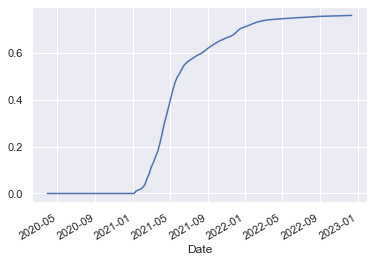

In [122]:
day_vax_df.percent_of_population_fully_vaccinated.dropna().plot()

In [123]:
# using forward filling to fill the missing values.
day_vax_df.interpolate(method='ffill',inplace=True)

<AxesSubplot:xlabel='Date'>

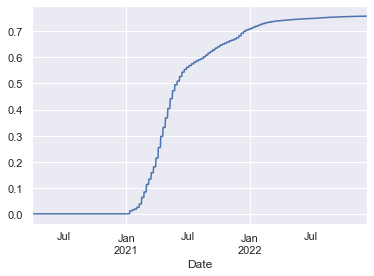

In [124]:
day_vax_df.percent_of_population_fully_vaccinated.plot()

# Filling the placeholder day_df

### Fill n_Hosp_t0

In [125]:
BM = day_hosp_df.county == 'Los Angeles'
wdf = pd.DataFrame(day_hosp_df[BM]).set_index('todays_date')

In [126]:
wdf

,county,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
todays_date,,,,,,,,
2020-03-29,Los Angeles,489.0,1132.0,NaN,NaN,191.0,182.0,345.0
2020-03-30,Los Angeles,601.0,1277.0,NaN,NaN,245.0,244.0,456.0
2020-03-31,Los Angeles,713.0,1239.0,NaN,NaN,315.0,239.0,445.0
2020-04-01,Los Angeles,739.0,1332.0,NaN,NaN,335.0,220.0,492.0
2020-04-02,Los Angeles,818.0,1270.0,NaN,NaN,346.0,193.0,488.0
...,...,...,...,...,...,...,...,...
2022-12-09,Los Angeles,1267.0,106.0,1373.0,19242.0,146.0,13.0,671.0
2022-12-10,Los Angeles,1180.0,110.0,1290.0,19153.0,137.0,12.0,715.0
2022-12-11,Los Angeles,1226.0,114.0,1340.0,19138.0,139.0,14.0,721.0


In [127]:
day_df.n_Hosp_t0 = wdf.reset_index().hospitalized_covid_confirmed_patients

In [128]:
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
0,2020-03-29,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-30,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-31,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-01,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-02,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
985,2022-12-09,1267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,2022-12-10,1180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,2022-12-11,1226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,2022-12-12,1267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='t0'>

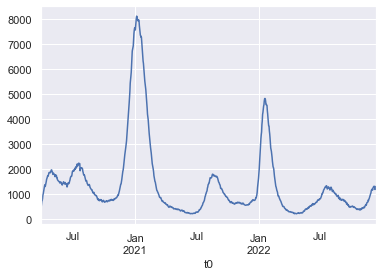

In [129]:
day_df.set_index('t0',drop=False,inplace=True)
day_df.n_Hosp_t0.plot()

### Fill n_Hosp_t14

In [130]:
# Function to add 14 days to t0
import datetime
def Retrieve_n_Hosp_t14(row):
    date_t0 = row.t0
    date_t14 = date_t0 + datetime.timedelta(days=14)
    #print(date_t14)
    if(date_t14 < day_df.iloc[-1].t0):
        return day_df.loc[date_t14].n_Hosp_t0


In [131]:
day_df.n_Hosp_t14 = day_df.apply(Retrieve_n_Hosp_t14,axis=1)

In [132]:
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1679.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,2022-12-09,1267.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-10,2022-12-10,1180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-11,2022-12-11,1226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fill s_Hosp_tn7_0

In [133]:
def linearFunction(t,a,b):
    y = a+ b*t
    return y

In [134]:
# finding the slope of the curve of hospitalizations 
# for the period t=-7 to t=0 
from scipy.optimize import curve_fit
def Retrieve_s_Hosp_tn7_0(row):
    date_t0 = row.t0
    date_t_n7 = date_t0 - datetime.timedelta(days=7)
    if(date_t_n7 >= day_df.iloc[0].t0):
        x_data = range(8)
        y_data = day_df.loc[date_t_n7:date_t0].n_Hosp_t0
        p,c= curve_fit(linearFunction, x_data, y_data)
        ## Uncomment and run if you want to see the curve fitting, Caveat: it will increase runtime
        #fit_y = linearFunction(x_data,p[0],p[1])
        #plt.plot(x_data,y_data,label='data' )
        #plt.plot(x_data, fit_y, '--', label='fit')
        #plt.xticks(x_data,y_data.index)
        #plt.legend()
        #plt.show()
        return p[1]

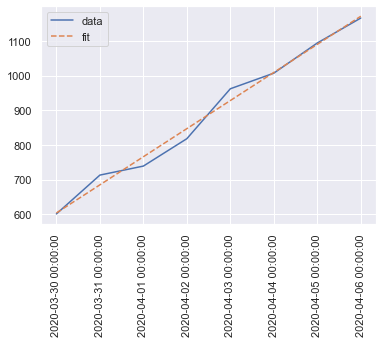

Slope for this curve is: 81.04761906073772


In [135]:
# Running a demo of the Retrieve_s_Hosp_tn7_0 function 
# for one row in day_df dataset
date_t0 = day_df.iloc[8].t0
date_t_n7 = date_t0 - datetime.timedelta(days=7)
x_data = range(8)
y_data = day_df.loc[date_t_n7:date_t0].n_Hosp_t0
p,c= curve_fit(linearFunction, x_data, y_data)
fit_y = linearFunction(x_data,p[0],p[1])
plt.plot(x_data,y_data,label='data' )
plt.plot(x_data, fit_y, '--', label='fit')
plt.xticks(x_data,y_data.index, rotation='vertical')
plt.legend()
plt.show()
print(f'Slope for this curve is: {p[1]}')

In [136]:
# applying the Retrieve_s_Hosp_tn7_0 function 
day_df.s_Hosp_tn7_0 = day_df.apply(Retrieve_s_Hosp_tn7_0, axis=1)

In [137]:
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1679.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,2022-12-09,1267.0,16.702382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-10,2022-12-10,1180.0,4.928571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-11,2022-12-11,1226.0,-7.345237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='t0'>

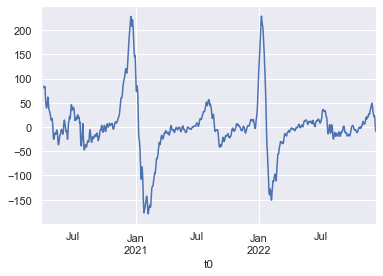

In [138]:
day_df.s_Hosp_tn7_0.plot()

### Fill n_days_MajHol

in this section, I will a code to fill the **n_days_MajHol** attribute in the placeholder day_df. **n_days_MajHol** represent the number of days from t0 to previous major holiday in the US

In [139]:
# creating a dictionary of US holidays from the start of the pandemic
# to today 15Dec 2022
dic_holidays={'Martin Luther King Jr. Day':'01/20/2020','Martin Luther King Jr. Day2':'01/21/2020',
             'Martin Luther King Jr. Day3':'01/22/2020',
             'Memorial day1': '05/23/2020','Memorial day2': '05/24/2020','Memorial day3': '05/25/2020',
             'Independence day1': '07/03/2020','Independence day2': '07/04/2020','Independence day3': '07/03/2020',
             'Labor day1': '09/05/2020','Labor day2': '09/06/2020','Labor day3': '09/07/2020',
             'Thanksgiving1': '11/26/2020', 'Thanksgiving2': '11/27/2020','Thanksgiving3': '11/28/2020',
             'Thanksgiving4': '11/29/2020', 'Christmas1': '12/25/2020', 'Christmas2': '12/26/2020',
             'Christmas3': '12/27/2020', 'Christmas4': '12/28/2020','Christmas5': '12/29/2020',
             'Christmas6': '12/30/2020', 'New Year Day': '01/01/2021','New Year Day2': '01/02/2021',
             'New Year Day3': '01/03/2021',
             'Martin Luther King Jr. Day_2021':'01/18/2021','Martin Luther King Jr. Day2_2021':'01/19/2021',
             'Martin Luther King Jr. Day3_2021':'01/20/2021',
             'Memorial day1_2021': '05/31/2021','Memorial day2_2021': '06/01/2021','Memorial day3_2021': '06/02/2021',
             'Independence day1_2021': '07/05/2021','Independence day2_2021': '07/06/2021',
             'Independence day3_2021': '07/07/2021',
             'Labor day1_2021': '09/06/2021','Labor day2_2021': '09/07/2021','Labor day3_2021': '09/08/2021', 
              'Thanksgiving1_2021': '11/26/2022','Thanksgiving2_2021': '11/27/2021','Thanksgiving3_2021': '11/28/2021',
              'Thanksgiving4_2021': '11/29/2021','Christmas1_2021': '12/25/2021','Christmas2_2021': '12/26/2021',
              'Christmas3_2021': '12/27/2021','Christmas4_2021': '12/28/2021','Christmas5_2021': '12/29/2021',
            'Christmas6_2021': '12/30/2021','Martin Luther King Jr. Day_2022': '01/18/2022',
              'Martin Luther King Jr. Day2_2022': '01/19/2022','Martin Luther King Jr. Day3_2022': '01/20/2022',
             'Memorial day1_2022': '05/31/2022','Memorial day2_2022': '06/01/2022','Memorial day3_2022': '06/02/2022',
             'Independence day1_2022': '07/05/2022','Independence day2_2022': '07/06/2022',
              'Independence day3_2022': '07/07/2022','Labor day1_2022': '09/06/2022','Labor day2_2022': '09/07/2022',
             'Labor day3_2022': '09/08/2022','Thanksgiving1_2022': '11/26/2022','Thanksgiving2_2022': '11/27/2022',
             'Thanksgiving3_2022': '11/28/2022','Thanksgiving4_2022': '11/29/2022',
            }

dic_holidays

{'Martin Luther King Jr. Day': '01/20/2020',
 'Martin Luther King Jr. Day2': '01/21/2020',
 'Martin Luther King Jr. Day3': '01/22/2020',
 'Memorial day1': '05/23/2020',
 'Memorial day2': '05/24/2020',
 'Memorial day3': '05/25/2020',
 'Independence day1': '07/03/2020',
 'Independence day2': '07/04/2020',
 'Independence day3': '07/03/2020',
 'Labor day1': '09/05/2020',
 'Labor day2': '09/06/2020',
 'Labor day3': '09/07/2020',
 'Thanksgiving1': '11/26/2020',
 'Thanksgiving2': '11/27/2020',
 'Thanksgiving3': '11/28/2020',
 'Thanksgiving4': '11/29/2020',
 'Christmas1': '12/25/2020',
 'Christmas2': '12/26/2020',
 'Christmas3': '12/27/2020',
 'Christmas4': '12/28/2020',
 'Christmas5': '12/29/2020',
 'Christmas6': '12/30/2020',
 'New Year Day': '01/01/2021',
 'New Year Day2': '01/02/2021',
 'New Year Day3': '01/03/2021',
 'Martin Luther King Jr. Day_2021': '01/18/2021',
 'Martin Luther King Jr. Day2_2021': '01/19/2021',
 'Martin Luther King Jr. Day3_2021': '01/20/2021',
 'Memorial day1_2021': 

In [140]:
holiday_sr = pd.Series(dic_holidays, name='Date')

In [141]:
holiday_sr = pd.to_datetime(holiday_sr, format="%m/%d/%Y")

In [142]:
holiday_sr.sort_values()

Martin Luther King Jr. Day    2020-01-20
Martin Luther King Jr. Day2   2020-01-21
Martin Luther King Jr. Day3   2020-01-22
Memorial day1                 2020-05-23
Memorial day2                 2020-05-24
                                 ...    
Thanksgiving1_2022            2022-11-26
Thanksgiving1_2021            2022-11-26
Thanksgiving2_2022            2022-11-27
Thanksgiving3_2022            2022-11-28
Thanksgiving4_2022            2022-11-29
Name: Date, Length: 63, dtype: datetime64[ns]

In [143]:
t0 = day_df.iloc[0].t0

wsr = pd.concat([holiday_sr,pd.Series({'t0_day':t0})]).sort_values()
wdf = pd.DataFrame(wsr).reset_index(drop=False)
wdf.columns=['name','Date']
wdf

# Getting the number of day between t0=2020-03-29 and
# the previous major holiday 
BM = wdf.name =='t0_day'
x = wdf[BM].Date.iloc[0] - wdf.loc[wdf[BM].index -1, 'Date'].iloc[0]
x.days

67

In [144]:
# Transforming the preivous code into a function to get n_days_MajHol
def Retrieve_n_days_MajHol(row):
    row.t0
    wsr = pd.concat([holiday_sr,pd.Series({'t0_day':row.t0})]).sort_values()
    wdf = pd.DataFrame(wsr).reset_index(drop=False)
    wdf.columns=['name','Date']
    # Getting the number of days between t0 and
    # the previous major holiday 
    BM = wdf.name =='t0_day'
    n_days = (wdf[BM].Date.iloc[0]) - (wdf.loc[wdf[BM].index -1, 'Date'].iloc[0])
    return n_days.days

In [145]:
# applying the  Retrieve_n_days_MajHol function
day_df.n_days_MajHol = day_df.apply(Retrieve_n_days_MajHol, axis=1)

In [146]:
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,NaN,NaN,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,1679.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,2022-12-09,1267.0,16.702382,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-10,2022-12-10,1180.0,4.928571,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-11,2022-12-11,1226.0,-7.345237,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fill av7_Case_tn6_0

**av7_Case_tn6_0**: The seven-day average of the number of cases for the period t=-6 to t=0 

In [147]:
day_case_df

,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
date,,,,,,,,,,,,,,,,,
2020-02-01,2020-02-01,Los Angeles,County,10257557.0,13.0,13.0,0.0,0.0,283.0,283,9.0,9,1.0,1.0,0.0,0.0,NaN
2020-02-02,2020-02-02,Los Angeles,County,10257557.0,4.0,17.0,0.0,0.0,23.0,306,1.0,10,0.0,1.0,0.0,0.0,NaN
2020-02-03,2020-02-03,Los Angeles,County,10257557.0,4.0,21.0,0.0,0.0,14.0,320,1.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-04,2020-02-04,Los Angeles,County,10257557.0,1.0,22.0,0.0,0.0,3.0,323,0.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-05,2020-02-05,Los Angeles,County,10257557.0,0.0,22.0,0.0,0.0,2.0,325,0.0,11,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-02,2022-12-02,Los Angeles,County,10257557.0,2330.0,3368368.0,5.0,34001.0,24334.0,75501104,2917.0,4253397,0.0,3346956.0,0.0,33937.0,NaN
2022-12-03,2022-12-03,Los Angeles,County,10257557.0,1432.0,3369800.0,2.0,34003.0,6883.0,75507987,930.0,4254327,0.0,3346956.0,0.0,33937.0,NaN
2022-12-04,2022-12-04,Los Angeles,County,10257557.0,734.0,3370534.0,1.0,34004.0,1055.0,75509042,165.0,4254492,0.0,3346956.0,0.0,33937.0,NaN


In [148]:
def Retrieve_av7_Case_tn6_0(row):
    date_t0 = row.t0
    date_t_n6 = date_t0 - datetime.timedelta(days=6)
    return day_case_df.loc[date_t_n6:date_t0, 'cases'].mean()

In [149]:
day_df.av7_Case_tn6_0 = day_df.apply(Retrieve_av7_Case_tn6_0, axis=1)

<AxesSubplot:xlabel='t0'>

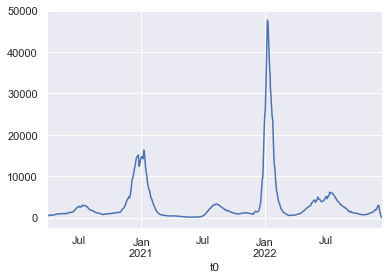

In [150]:
day_df.av7_Case_tn6_0.plot()

### Fill s_Case_tn14_0

**s_Case_tn14_0**: The slope of the curve of cases for the period t=-14 to t=0

In [151]:
def Retrieve_s_Case_tn14_0(row):
    date_t0 = row.t0
    date_t_n14 = date_t0 - datetime.timedelta(days=14)

    x_data = range(15)
    y_data = day_case_df.loc[date_t_n14:date_t0].cases
    if len(y_data) == len(x_data):
        p,c= curve_fit(linearFunction, x_data, y_data)
        return p[1]

In [152]:
day_df.s_Case_tn14_0 = day_df.apply(Retrieve_s_Case_tn14_0,axis=1)

<AxesSubplot:xlabel='t0'>

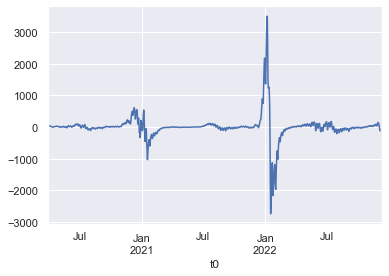

In [153]:
day_df.s_Case_tn14_0.plot()

In [154]:
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,382.714286,16.807143,NaN,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,428.142857,21.785714,NaN,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,478.428571,27.285714,NaN,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,509.714286,31.103571,NaN,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,545.428571,32.225000,NaN,NaN,NaN,NaN,1679.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,2022-12-09,1267.0,16.702382,10,569.500000,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-10,2022-12-10,1180.0,4.928571,11,282.000000,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-11,2022-12-11,1226.0,-7.345237,12,56.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# last_date = min([day_case_df.date.max(), day_hosp_df.todays_date.max()])

# day_df = day_df.iloc[:last_date]
# day_df
#pd.to_datetime(last_date.date())


### Fill av7_Death_tn6_0

In [156]:
day_case_df


,date,area,area_type,population,cases,cumulative_cases,deaths,cumulative_deaths,total_tests,cumulative_total_tests,positive_tests,cumulative_positive_tests,reported_cases,cumulative_reported_cases,reported_deaths,cumulative_reported_deaths,reported_tests
date,,,,,,,,,,,,,,,,,
2020-02-01,2020-02-01,Los Angeles,County,10257557.0,13.0,13.0,0.0,0.0,283.0,283,9.0,9,1.0,1.0,0.0,0.0,NaN
2020-02-02,2020-02-02,Los Angeles,County,10257557.0,4.0,17.0,0.0,0.0,23.0,306,1.0,10,0.0,1.0,0.0,0.0,NaN
2020-02-03,2020-02-03,Los Angeles,County,10257557.0,4.0,21.0,0.0,0.0,14.0,320,1.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-04,2020-02-04,Los Angeles,County,10257557.0,1.0,22.0,0.0,0.0,3.0,323,0.0,11,0.0,1.0,0.0,0.0,NaN
2020-02-05,2020-02-05,Los Angeles,County,10257557.0,0.0,22.0,0.0,0.0,2.0,325,0.0,11,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-02,2022-12-02,Los Angeles,County,10257557.0,2330.0,3368368.0,5.0,34001.0,24334.0,75501104,2917.0,4253397,0.0,3346956.0,0.0,33937.0,NaN
2022-12-03,2022-12-03,Los Angeles,County,10257557.0,1432.0,3369800.0,2.0,34003.0,6883.0,75507987,930.0,4254327,0.0,3346956.0,0.0,33937.0,NaN
2022-12-04,2022-12-04,Los Angeles,County,10257557.0,734.0,3370534.0,1.0,34004.0,1055.0,75509042,165.0,4254492,0.0,3346956.0,0.0,33937.0,NaN


In [157]:
import datetime
def Retrieve_av7_Death_tn6_0(row):
    data_t0 = row.t0
    date_t_n6 = data_t0 - datetime.timedelta(days=6)

    return day_case_df.loc[date_t_n6:data_t0].deaths.mean()

In [158]:
day_df.av7_Death_tn6_0 = day_df.apply(Retrieve_av7_Death_tn6_0, axis=1)

<AxesSubplot:xlabel='t0'>

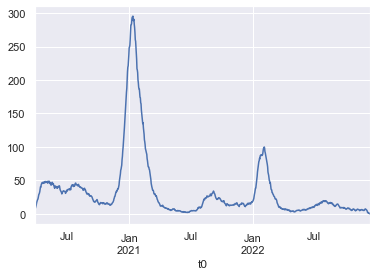

In [159]:
day_df.av7_Death_tn6_0.plot()

In [160]:
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,382.714286,16.807143,7.857143,NaN,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,428.142857,21.785714,8.428571,NaN,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,478.428571,27.285714,10.428571,NaN,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,509.714286,31.103571,12.285714,NaN,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,545.428571,32.225000,15.142857,NaN,NaN,NaN,1679.0


### Fill s_Death_tn14_0

In [161]:
import datetime
def Retrieve_s_Death_tn14_0(row):
    data_t0 = row.t0
    date_t_n14 = data_t0 - datetime.timedelta(days=14)
    x_data = range(15)
    y_data = day_case_df.loc[date_t_n14:data_t0].deaths
    if len(y_data) == len(x_data):
        p,c= curve_fit(linearFunction, x_data, y_data)
        return p[1]

In [162]:
day_df.s_Death_tn14_0 = day_df.apply(Retrieve_s_Death_tn14_0,axis=1)

<AxesSubplot:xlabel='t0'>

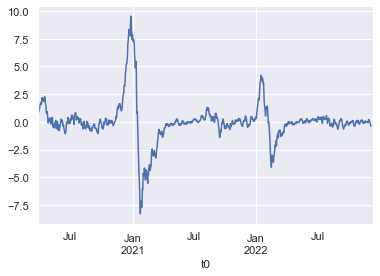

In [163]:
day_df.s_Death_tn14_0.plot()

In [164]:
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,382.714286,16.807143,7.857143,0.853571,NaN,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,428.142857,21.785714,8.428571,0.878571,NaN,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,478.428571,27.285714,10.428571,1.014286,NaN,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,509.714286,31.103571,12.285714,1.164286,NaN,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,545.428571,32.225000,15.142857,1.342857,NaN,NaN,1679.0


### Fill p_FullVax_t0

In [165]:
day_vax_df

,Date,percent_of_population_fully_vaccinated
Date,,
2020-03-29,2020-03-29,0.000000
2020-03-30,2020-03-30,0.000000
2020-03-31,2020-03-31,0.000000
2020-04-01,2020-04-01,0.000000
2020-04-02,2020-04-02,0.000000
...,...,...
2022-12-09,2022-12-09,0.757962
2022-12-10,2022-12-10,0.757962
2022-12-11,2022-12-11,0.757962


In [166]:
def Retrieve_p_FullVax_t0(row):
    date_t0 = row.t0
    return day_vax_df.loc[date_t0].percent_of_population_fully_vaccinated

In [167]:
day_df.p_FullVax_t0 = day_df.apply(Retrieve_p_FullVax_t0, axis=1)

<AxesSubplot:xlabel='t0'>

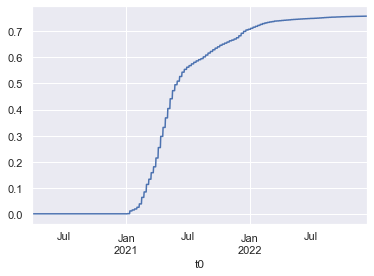

In [168]:
day_df.p_FullVax_t0.plot()

In [169]:
day_df.head()

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,382.714286,16.807143,7.857143,0.853571,0.0,NaN,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,428.142857,21.785714,8.428571,0.878571,0.0,NaN,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,478.428571,27.285714,10.428571,1.014286,0.0,NaN,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,509.714286,31.103571,12.285714,1.164286,0.0,NaN,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,545.428571,32.225000,15.142857,1.342857,0.0,NaN,1679.0


### Fill s_FullVax_tn14_0

In [170]:
import datetime
def Retrieve_s_FullVax_tn14_0(row):
    date_t0 = row.t0
    date_t_n14 = date_t0 - datetime.timedelta(days=14)
    x_data = range(15)
    y_data = day_vax_df.loc[date_t_n14: date_t0].percent_of_population_fully_vaccinated
    
    if len(y_data) == len(x_data):
        p,c = curve_fit(linearFunction, x_data, y_data)
        return p[1]

In [171]:
day_vax_df

,Date,percent_of_population_fully_vaccinated
Date,,
2020-03-29,2020-03-29,0.000000
2020-03-30,2020-03-30,0.000000
2020-03-31,2020-03-31,0.000000
2020-04-01,2020-04-01,0.000000
2020-04-02,2020-04-02,0.000000
...,...,...
2022-12-09,2022-12-09,0.757962
2022-12-10,2022-12-10,0.757962
2022-12-11,2022-12-11,0.757962


In [172]:
day_df.s_FullVax_tn14_0 = day_df.apply(Retrieve_s_FullVax_tn14_0, axis=1)

In [173]:
# filling the first 14 observation with zero
# there was no vaccin at that time
day_df.s_FullVax_tn14_0.fillna(0,inplace=True)

<AxesSubplot:xlabel='t0'>

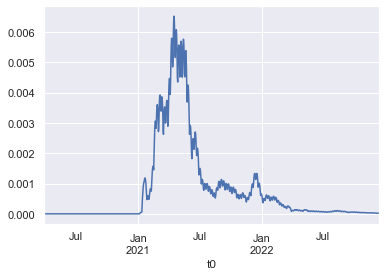

In [174]:
day_df.s_FullVax_tn14_0.plot()

In [175]:
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,382.714286,16.807143,7.857143,0.853571,0.000000,0.000000,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,428.142857,21.785714,8.428571,0.878571,0.000000,0.000000,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,478.428571,27.285714,10.428571,1.014286,0.000000,0.000000,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,509.714286,31.103571,12.285714,1.164286,0.000000,0.000000,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,545.428571,32.225000,15.142857,1.342857,0.000000,0.000000,1679.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,2022-12-09,1267.0,16.702382,10,569.500000,NaN,1.250000,NaN,0.757962,0.000024,NaN
2022-12-10,2022-12-10,1180.0,4.928571,11,282.000000,NaN,1.000000,NaN,0.757962,0.000024,NaN
2022-12-11,2022-12-11,1226.0,-7.345237,12,56.000000,NaN,1.000000,NaN,0.757962,0.000023,NaN


In [176]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 990 entries, 2020-03-29 to 2022-12-13
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   t0                990 non-null    datetime64[ns]
 1   n_Hosp_t0         990 non-null    float64       
 2   s_Hosp_tn7_0      983 non-null    float64       
 3   n_days_MajHol     990 non-null    int64         
 4   av7_Case_tn6_0    989 non-null    float64       
 5   s_Case_tn14_0     983 non-null    float64       
 6   av7_Death_tn6_0   989 non-null    float64       
 7   s_Death_tn14_0    983 non-null    float64       
 8   p_FullVax_t0      990 non-null    float64       
 9   s_FullVax_tn14_0  990 non-null    float64       
 10  n_Hosp_t14        975 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 125.1 KB


# Feature Selection


### Linear Regression 

In [177]:
import statsmodels.api as sm

Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0'])
Xs = sm.add_constant(Xs)

y = day_df.dropna().n_Hosp_t14

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1718.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:26:11   Log-Likelihood:                -7109.6
No. Observations:                 968   AIC:                         1.424e+04
Df Residuals:                     958   BIC:                         1.429e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              346.9185     46.444      7.470      0.000     255.775     438.062
n_Hosp_t0            1.0677      0.056     18.934      0.000       0.957       1.178
s_Hosp_tn7_0         8.4613      0.601     14.080      0.000       7.282       9.641
n_days_MajHol       -1.7884      0.406     -4.403      0.000      -2.585      -0.991
av7_Case_tn6_0      -0.0318      0.004     -7.312      0.000      -0.040      -0.023
s_Case_tn14_0        0.6508      0.047     13.786      0.000       0.558       0.743
av7_Death_tn6_0     -5.4962      1.458     -3.769      0.000      -8.358      -2.635
s_Death_tn14_0       8.5634     13.577      0.631      0.528     -18.081      35.208
p_FullVax_t0      -143.5796     48.507     -2.960      0.003    -238.773     -48.387
s_FullVax_tn14_0 -1.443e+04   9637.103     -1.497      0.135   -3.33e+04    4484.751
==============================================================================
Omnibus:                      353.906   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2065.827
Skew:                           1.560   Prob(JB):                         0.00
Kurtosis:                       9.441   Cond. No.                     5.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
import statsmodels.api as sm

Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0','s_FullVax_tn14_0'])
Xs = sm.add_constant(Xs)

y = day_df.dropna().n_Hosp_t14

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1930.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:26:11   Log-Likelihood:                -7110.8
No. Observations:                 968   AIC:                         1.424e+04
Df Residuals:                     959   BIC:                         1.428e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             332.7448     45.498      7.313      0.000     243.458     422.032
n_Hosp_t0           1.0834      0.055     19.540      0.000       0.975       1.192
s_Hosp_tn7_0        8.4183      0.601     14.016      0.000       7.240       9.597
n_days_MajHol      -1.9325      0.395     -4.894      0.000      -2.707      -1.158
av7_Case_tn6_0     -0.0329      0.004     -7.648      0.000      -0.041      -0.024
s_Case_tn14_0       0.6575      0.047     13.982      0.000       0.565       0.750
av7_Death_tn6_0    -5.8709      1.437     -4.084      0.000      -8.692      -3.050
s_Death_tn14_0     10.2777     13.538      0.759      0.448     -16.289      36.844
p_FullVax_t0     -135.4946     48.237     -2.809      0.005    -230.157     -40.832
==============================================================================
Omnibus:                      349.017   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2003.944
Skew:                           1.541   Prob(JB):                         0.00
Kurtosis:                       9.339   Cond. No.                     3.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
import statsmodels.api as sm

Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0','s_FullVax_tn14_0','s_Death_tn14_0'])
Xs = sm.add_constant(Xs)

y = day_df.dropna().n_Hosp_t14

sm.OLS(y, Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2206.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:26:11   Log-Likelihood:                -7111.1
No. Observations:                 968   AIC:                         1.424e+04
Df Residuals:                     960   BIC:                         1.428e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             327.6743     44.995      7.282      0.000     239.374     415.975
n_Hosp_t0           1.0808      0.055     19.534      0.000       0.972       1.189
s_Hosp_tn7_0        8.7797      0.366     23.980      0.000       8.061       9.498
n_days_MajHol      -1.9217      0.395     -4.871      0.000      -2.696      -1.147
av7_Case_tn6_0     -0.0332      0.004     -7.763      0.000      -0.042      -0.025
s_Case_tn14_0       0.6419      0.042     15.174      0.000       0.559       0.725
av7_Death_tn6_0    -5.6886      1.417     -4.015      0.000      -8.469      -2.908
p_FullVax_t0     -128.6793     47.384     -2.716      0.007    -221.667     -35.691
==============================================================================
Omnibus:                      352.255   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2032.889
Skew:                           1.556   Prob(JB):                         0.00
Kurtosis:                       9.381   Cond. No.                     3.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear regression:
Conclusion 

In the following figure, we see that linear regression deems all of the independent attributes significant for the prediction of n_Hosp_t14, except for 's_Death_tn14_0' and s_FullVax_tn14_0.
Pay attention to the P>|t| column, which shows with the p-value of the test on the null hypothesis that the relevant dependent attribute is not capable of predicting the target in this model. The p-values for all of the other independent attributes – except 's_Death_tn14_0' and 's_FullVax_tn14_0' – are very small, indicating the rejection of the null hypothesis.

We should remember to take the conclusion from the preceding figure with the caveat that linear regression is only capable of checking the linear relationships for us, and that these two attributes may have non-linear relationships that could be useful in a more complex model.

### Random Forest

In [180]:
from sklearn.ensemble import RandomForestRegressor

Xs = day_df.dropna().drop(columns=['n_Hosp_t14','t0'])
y = day_df.dropna().n_Hosp_t14

rf = RandomForestRegressor(n_estimators=3000)
rf.fit(Xs, y)

RandomForestRegressor(n_estimators=3000)

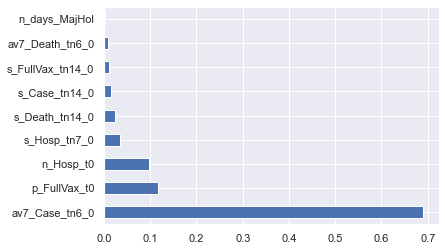

In [181]:
importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.show()


The preceding figure visualizes the importance that the Random Forest has given to each independent attribute, and we do see, unlike our conclusion we arrive at under Linear Regression, only *n_days_MajHol* has not given any sizable share of importance.

###  Decision Tree

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'criterion':['mse','friedman_mse','mae','squared_error','absolute_error','poisson'],
    'splitter' : ['best','random'],
    'max_depth': [10, 20, 40, 50, 60], 
    'min_samples_split': [5, 10, 20, 30, 40], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
gridSearch.fit(Xs, y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  -908939.4679634159
Best parameters:  {'criterion': 'poisson', 'max_depth': 60, 'min_impurity_decrease': 0.005, 'min_samples_split': 30, 'splitter': 'random'}


In [183]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'



In [184]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
import graphviz

dt = DecisionTreeRegressor(criterion=gridSearch.best_params_['criterion'],
                           splitter=gridSearch.best_params_['splitter'],
                           max_depth=gridSearch.best_params_['max_depth'],
                           min_samples_split = gridSearch.best_params_['min_samples_split'],
                           min_impurity_decrease = gridSearch.best_params_['min_impurity_decrease'])
dt.fit(Xs, y)

dot_data = export_graphviz(dt, 
                           out_file=None, 
                           feature_names=Xs.columns,   
                           filled=True,
                           rounded=True, 
                           special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render(filename='HospDT')


'HospDT.pdf'

In [185]:
day_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-03-29,2020-03-29,489.0,NaN,67,382.714286,16.807143,7.857143,0.853571,0.000000,0.000000,1433.0
2020-03-30,2020-03-30,601.0,NaN,68,428.142857,21.785714,8.428571,0.878571,0.000000,0.000000,1501.0
2020-03-31,2020-03-31,713.0,NaN,69,478.428571,27.285714,10.428571,1.014286,0.000000,0.000000,1587.0
2020-04-01,2020-04-01,739.0,NaN,70,509.714286,31.103571,12.285714,1.164286,0.000000,0.000000,1624.0
2020-04-02,2020-04-02,818.0,NaN,71,545.428571,32.225000,15.142857,1.342857,0.000000,0.000000,1679.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,2022-12-09,1267.0,16.702382,10,569.500000,NaN,1.250000,NaN,0.757962,0.000024,NaN
2022-12-10,2022-12-10,1180.0,4.928571,11,282.000000,NaN,1.000000,NaN,0.757962,0.000024,NaN
2022-12-11,2022-12-11,1226.0,-7.345237,12,56.000000,NaN,1.000000,NaN,0.757962,0.000023,NaN


# Prediction

In [186]:
# creating a check point
pred_df = day_df

In [187]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 990 entries, 2020-03-29 to 2022-12-13
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   t0                990 non-null    datetime64[ns]
 1   n_Hosp_t0         990 non-null    float64       
 2   s_Hosp_tn7_0      983 non-null    float64       
 3   n_days_MajHol     990 non-null    int64         
 4   av7_Case_tn6_0    989 non-null    float64       
 5   s_Case_tn14_0     983 non-null    float64       
 6   av7_Death_tn6_0   989 non-null    float64       
 7   s_Death_tn14_0    983 non-null    float64       
 8   p_FullVax_t0      990 non-null    float64       
 9   s_FullVax_tn14_0  990 non-null    float64       
 10  n_Hosp_t14        975 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 125.1 KB


In [188]:
# removing data objects with missing values
pred_df.dropna(inplace=True)

In [207]:
pred_df

,t0,n_Hosp_t0,s_Hosp_tn7_0,n_days_MajHol,av7_Case_tn6_0,s_Case_tn14_0,av7_Death_tn6_0,s_Death_tn14_0,p_FullVax_t0,s_FullVax_tn14_0,n_Hosp_t14
t0,,,,,,,,,,,
2020-04-05,2020-04-05,1094.0,84.416667,74,668.714286,32.328571,20.714286,1.739286e+00,0.000000,0.000000,1739.0
2020-04-06,2020-04-06,1166.0,81.047619,75,657.428571,27.192857,21.571429,1.550000e+00,0.000000,0.000000,1791.0
2020-04-07,2020-04-07,1251.0,80.642857,76,667.571429,26.578571,23.285714,1.700000e+00,0.000000,0.000000,1854.0
2020-04-08,2020-04-08,1331.0,83.428571,77,665.857143,21.903571,26.285714,1.957143e+00,0.000000,0.000000,1858.0
2020-04-09,2020-04-09,1368.0,77.369048,78,658.714286,18.589286,28.714286,2.192857e+00,0.000000,0.000000,1863.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,2022-11-24,870.0,29.857143,77,1873.714286,55.671429,5.142857,-5.000000e-02,0.757661,0.000032,1308.0
2022-11-25,2022-11-25,919.0,34.845238,78,1939.285714,66.739285,5.285714,-2.181144e-12,0.757661,0.000032,1267.0
2022-11-26,2022-11-26,959.0,37.571428,0,2020.857143,57.571429,5.000000,-3.571429e-03,0.757661,0.000031,1180.0


In [189]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 968 entries, 2020-04-05 to 2022-11-28
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   t0                968 non-null    datetime64[ns]
 1   n_Hosp_t0         968 non-null    float64       
 2   s_Hosp_tn7_0      968 non-null    float64       
 3   n_days_MajHol     968 non-null    int64         
 4   av7_Case_tn6_0    968 non-null    float64       
 5   s_Case_tn14_0     968 non-null    float64       
 6   av7_Death_tn6_0   968 non-null    float64       
 7   s_Death_tn14_0    968 non-null    float64       
 8   p_FullVax_t0      968 non-null    float64       
 9   s_FullVax_tn14_0  968 non-null    float64       
 10  n_Hosp_t14        968 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 90.8 KB


To be able to see the applicability of the prediction models, we will use a small part from the data to evaluate how the model makes predictions.

Specifically, in this case study, after removing the rows that have any missing values, we have 968 data objects that can be used for prediction. We will use 954 of these data objects for training, specifically, the data objects from 2020-04-05 to 2022-11-14 (which would include 954 data objects). The rest, which are 14 data objects from two weeks of the data (that is, the data objects from 2022-11-15 to 2022-11-28), will be used for testing our models. Using these dates, we will separate our data into train and test sets. We will then train the algorithms using the train set and evaluate them using the test set.



In [190]:
# X_train, y_train
X_train = pred_df.iloc[:-28].drop(columns=['t0', 'n_Hosp_t14'])
y_train = pred_df.iloc[:-28].n_Hosp_t14

In [191]:
X_train.shape

(940, 9)

In [192]:
y_train.shape

(940,)

In [193]:
X_test = pred_df.iloc[-28:-14].drop(columns=['t0', 'n_Hosp_t14'])
y_test = pred_df.iloc[-28:-14].n_Hosp_t14

In [194]:
X_test.shape, y_test.shape

((14, 9), (14,))

In [195]:
# '2022-11-28'
X_predict = pred_df.iloc[-14:].drop(columns=['t0', 'n_Hosp_t14'])

In [197]:
X_predict.shape

(14, 9)

## Linear Regression

In [198]:
import statsmodels.api as sm

X_train_local = sm.add_constant(X_train.drop(columns = ['s_FullVax_tn14_0','s_Death_tn14_0']))

sm.OLS(y_train, X_train_local).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             n_Hosp_t14   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     2156.
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:32:30   Log-Likelihood:                -6915.0
No. Observations:                 940   AIC:                         1.385e+04
Df Residuals:                     932   BIC:                         1.388e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             337.3752     45.911      7.348      0.000     247.274     427.476
n_Hosp_t0           1.0789      0.056     19.123      0.000       0.968       1.190
s_Hosp_tn7_0        8.7591      0.371     23.641      0.000       8.032       9.486
n_days_MajHol      -2.0603      0.403     -5.117      0.000      -2.851      -1.270
av7_Case_tn6_0     -0.0328      0.004     -7.481      0.000      -0.041      -0.024
s_Case_tn14_0       0.6403      0.043     14.938      0.000       0.556       0.724
av7_Death_tn6_0    -5.6873      1.442     -3.945      0.000      -8.517      -2.858
p_FullVax_t0     -141.7870     49.034     -2.892      0.004    -238.017     -45.557
==============================================================================
Omnibus:                      340.092   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1910.021
Skew:                           1.552   Prob(JB):                         0.00
Kurtosis:                       9.255   Cond. No.                     3.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [200]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X_train.drop(columns = ['s_FullVax_tn14_0','s_Death_tn14_0'],inplace=True)
lm.fit(X_train, y_train)

LinearRegression()

In [201]:
# print lm intercept and coefficients
print('intercept ', lm.intercept_)
print(pd.DataFrame({'Predictor': X_train.columns, 'coefficient': lm.coef_}))

intercept  337.37524434837746
         Predictor  coefficient
0        n_Hosp_t0     1.078883
1     s_Hosp_tn7_0     8.759109
2    n_days_MajHol    -2.060338
3   av7_Case_tn6_0    -0.032772
4    s_Case_tn14_0     0.640333
5  av7_Death_tn6_0    -5.687323
6     p_FullVax_t0  -141.786993


In [202]:
model_predict = pd.Series(lm.predict(X_train),
                        index = y_train.index)

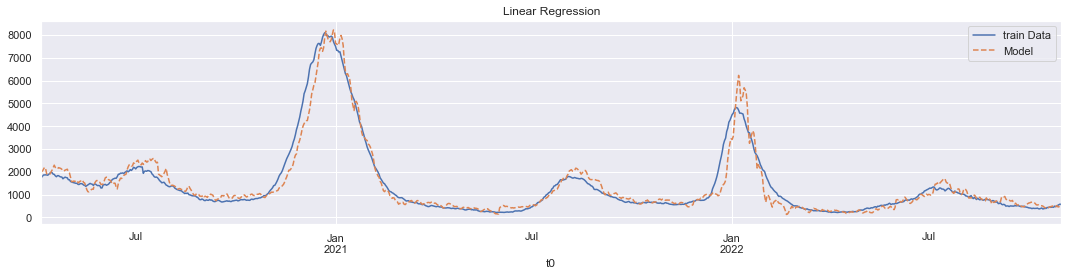

In [203]:
plt.figure(figsize=(15,4))
y_train.plot(label='train Data')
model_predict.plot(label = 'Model',style='--')

plt.title('Linear Regression')
plt.legend()
plt.tight_layout()
plt.savefig('LR DATAvsModel.png',dpi=900)

In [204]:
y_test

t0
2022-11-01     589.0
2022-11-02     648.0
2022-11-03     666.0
2022-11-04     670.0
2022-11-05     681.0
2022-11-06     760.0
2022-11-07     741.0
2022-11-08     794.0
2022-11-09     822.0
2022-11-10     870.0
2022-11-11     919.0
2022-11-12     959.0
2022-11-13    1007.0
2022-11-14    1040.0
Name: n_Hosp_t14, dtype: float64

In [205]:
test_period = [i+ datetime.timedelta(days=14) for i in y_test.index]
predict_period = [i+ datetime.timedelta(days=14) for i in X_predict.index]

In [206]:
test_period

[Timestamp('2022-11-15 00:00:00'),
 Timestamp('2022-11-16 00:00:00'),
 Timestamp('2022-11-17 00:00:00'),
 Timestamp('2022-11-18 00:00:00'),
 Timestamp('2022-11-19 00:00:00'),
 Timestamp('2022-11-20 00:00:00'),
 Timestamp('2022-11-21 00:00:00'),
 Timestamp('2022-11-22 00:00:00'),
 Timestamp('2022-11-23 00:00:00'),
 Timestamp('2022-11-24 00:00:00'),
 Timestamp('2022-11-25 00:00:00'),
 Timestamp('2022-11-26 00:00:00'),
 Timestamp('2022-11-27 00:00:00'),
 Timestamp('2022-11-28 00:00:00')]

In [208]:
predict_period

[Timestamp('2022-11-29 00:00:00'),
 Timestamp('2022-11-30 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2022-12-02 00:00:00'),
 Timestamp('2022-12-03 00:00:00'),
 Timestamp('2022-12-04 00:00:00'),
 Timestamp('2022-12-05 00:00:00'),
 Timestamp('2022-12-06 00:00:00'),
 Timestamp('2022-12-07 00:00:00'),
 Timestamp('2022-12-08 00:00:00'),
 Timestamp('2022-12-09 00:00:00'),
 Timestamp('2022-12-10 00:00:00'),
 Timestamp('2022-12-11 00:00:00'),
 Timestamp('2022-12-12 00:00:00')]

In [211]:
# predict X_test
predict_test = pd.Series(lm.predict(X_test.drop(columns = ['s_FullVax_tn14_0','s_Death_tn14_0'])), index=test_period)

# predict X_predict
predict_predict = pd.Series(lm.predict(X_predict.drop(columns = ['s_FullVax_tn14_0','s_Death_tn14_0'])), index=predict_period)

update_y_test = pd.Series(y_test.values, index = test_period)

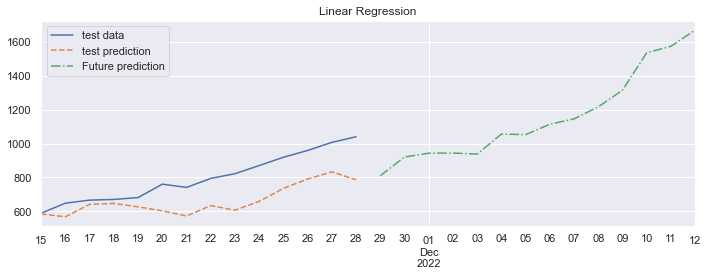

In [212]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
predict_test.plot(label='test prediction',style='--')
predict_predict.plot (label='Future prediction',style='-.')
plt.title('Linear Regression')
plt.legend()
plt.tight_layout()
plt.savefig('LR Test_Prediction.png',dpi=900)

### Decision Tree

In [213]:
# X_train, y_train
X_train = pred_df.iloc[:-28].drop(columns=['t0', 'n_Hosp_t14'])
y_train = pred_df.iloc[:-28].n_Hosp_t14
X_test = pred_df.iloc[-28:-14].drop(columns=['t0', 'n_Hosp_t14'])
y_test = pred_df.iloc[-28:-14].n_Hosp_t14
X_predict = pred_df.iloc[-14:].drop(columns=['t0', 'n_Hosp_t14'])

In [214]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
import graphviz

dt = DecisionTreeRegressor(criterion=gridSearch.best_params_['criterion'],
                           splitter=gridSearch.best_params_['splitter'],
                           max_depth=gridSearch.best_params_['max_depth'],
                           min_samples_split = gridSearch.best_params_['min_samples_split'],
                           min_impurity_decrease = gridSearch.best_params_['min_impurity_decrease'])
dt.fit(X_train, y_train)


DecisionTreeRegressor(criterion='poisson', max_depth=60,
                      min_impurity_decrease=0.005, min_samples_split=30,
                      splitter='random')

In [215]:
dt_model_predict = pd.Series(dt.predict(X_train),
                        index = y_train.index)

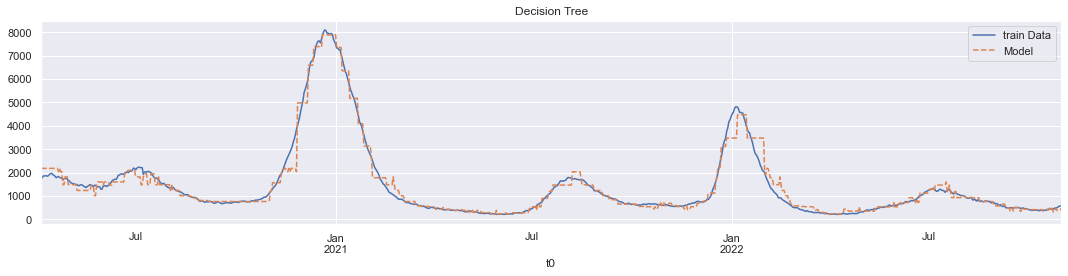

In [216]:
plt.figure(figsize=(15,4))
y_train.plot(label='train Data')
dt_model_predict.plot(label = 'Model',style='--')

plt.title('Decision Tree')
plt.legend()
plt.tight_layout()
plt.savefig('DT DATAvsModel.png',dpi=900)

In [218]:
dt_predict_test = pd.Series(dt.predict(X_test),
                        index = test_period)
dt_predict_predict = pd.Series(dt.predict(X_predict),
                        index = predict_period)

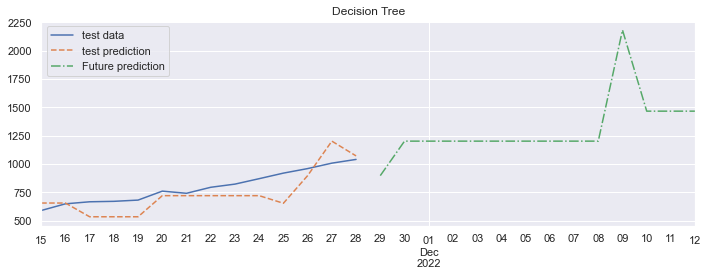

In [219]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
dt_predict_test.plot(label='test prediction',style='--')
dt_predict_predict.plot(label='Future prediction',style='-.')
plt.title('Decision Tree')
plt.legend()
plt.tight_layout()
plt.savefig('DT Test_Prediction.png',dpi=900)

## MLP

In [220]:
# X_train, y_train
X_train = pred_df.iloc[:-28].drop(columns=['t0', 'n_Hosp_t14'])
y_train = pred_df.iloc[:-28].n_Hosp_t14
X_test = pred_df.iloc[-28:-14].drop(columns=['t0', 'n_Hosp_t14'])
y_test = pred_df.iloc[-28:-14].n_Hosp_t14
X_predict = pred_df.iloc[-14:].drop(columns=['t0', 'n_Hosp_t14'])

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

param_grid = {
    'hidden_layer_sizes':[5,(5,5),(10,5),(5,10),(5,5,5),(5,10,5),(10,5,10)],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','adam'],
    'learning_rate':['constant','invscaling','adaptive'],
    'max_iter':[200,500,1000,2000]}

gridSearch = GridSearchCV(MLPRegressor(), param_grid, cv=4,
                          scoring='neg_mean_squared_error',verbose=2)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 4 folds for each of 672 candidates, totalling 2688 fits
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, ma

[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=

[CV] END activation=identity, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=50

[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=500, solve

[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=500, solve

[CV] END activation=identity, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max

[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max

[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max

[CV] END activation=identity, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=(5, 10, 5), learn

[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_ra

[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=2000, solver=adam; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=(10, 5, 10), learnin

[CV] END activation=logistic, hidden_layer_sizes=5, learning_rate=constant, max_iter=2000, solver=adam; total time=   2.1s
[CV] END activation=logistic, hidden_layer_sizes=5, learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=5, learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=5, learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=5, learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=5, learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=5, learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=5, learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.1s
[CV] 

[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=constant, max_iter=500, solver=lbfgs;

[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs;

[CV] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5), learning_rate=invscaling, max

[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=constant, max_iter=500, solve

[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=500, solve

[CV] END activation=logistic, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 5, 5), learning_rate

[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=const

[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(5, 10, 5), learning_rate=adapt

[CV] END activation=logistic, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(10, 5, 10

[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=5, lear

[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=5, l

[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=adam; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=adam; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=1000, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=1000, solver=adam; total tim

[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=adam; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=2000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=2000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=2000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=2000, solver=lbfgs; total time=   0

[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=2000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=2000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=2000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=2000, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=2000, solver=adam; total time=   3.1s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=2000, solver=adam; total time=   3

[CV] END activation=tanh, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=2000, solver=adam; total time=   3.6s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=2000, solver=adam; total time=   3.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=2000, solver=adam; total time=   3.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=2000, solver=adam; total time=   2.9s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=

[CV] END activation=tanh, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=2000, solver=adam; total time=   3.6s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=2000, solver=adam; total time=   3.7s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(5, 5, 5), learning_rate=invscaling, max_iter=200, solver

[CV] END activation=tanh, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=2000, solver=adam; total time=   3.5s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=constant, max_iter=200, solver=adam;

[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=2000, solver=adam; total time=   4.7s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(5, 10, 5), learning_rate=adaptive, max_iter=200, solver=ad

[CV] END activation=tanh, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=2000, solver=adam; total time=   3.9s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max_iter=200, solver=adam; total time=   0.3s
[CV] END activation=tanh, hidden_layer_sizes=(10, 5, 10), learning_rate=invscaling, max

[CV] END activation=tanh, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=2000, solver=adam; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=constant, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=relu, hidden_layer_si

[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=200, solver=adam; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=adaptive, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=5, lear

[CV] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=invscaling, max_iter=500, solver=adam; total time=   0

[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=500, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=500, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=constant, max_iter=1000, solver=lbfgs; total time=   0.0s
[C

[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 5), learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.3s


[CV] END activation=relu, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=500, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=500, solver=adam; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=1000, solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(5, 10), learning_rate=invscaling, max_iter=1000, solver=adam; t

[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=1000, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=1000, solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=1000, solver=lbfgs; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=1000, solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=1000, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=1000, solver=adam; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=constant, max_iter=1000, solver=adam;

[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=(5, 5, 5), learning_rate=adaptive, max_iter=2000, solver=lbfgs;

[CV] END activation=relu, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.2s
[CV] END activation=relu, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=1000, solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=1000, solver=adam; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=1000, solver=adam; total time=   0.4s
[CV] END activation=relu, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_iter=1000, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(5, 10, 5), learning_rate=invscaling, max_

[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=1000, solver=lbfgs; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=1000, solver=lbfgs; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=1000, solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=1000, solver=adam; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=1000, solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=1000, solver=adam; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=constant, max_iter=200

[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=1000, solver=lbfgs; total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   1.5s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=1000, solver=adam; total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 5, 10), learning_rate=adaptive, max_iter=200

In [ ]:
# Score:  -181075.06235203784
# Parameters:  {'activation': 'relu', 'hidden_layer_sizes': (5, 5), 'learning_rate': 'invscaling', 'max_iter': 200, 'solver': 'lbfgs'}

In [222]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=gridSearch.best_params_['hidden_layer_sizes'],
                   activation=gridSearch.best_params_['activation'],
                   learning_rate=gridSearch.best_params_['learning_rate'],
                   solver=gridSearch.best_params_['solver'],
                   max_iter=gridSearch.best_params_['max_iter'])
mlp.fit(X_train, y_train)    

MLPRegressor(hidden_layer_sizes=(5, 5), learning_rate='invscaling',
             solver='lbfgs')

In [223]:
mlp_model_predict = pd.Series(mlp.predict(X_train),
                        index = y_train.index)

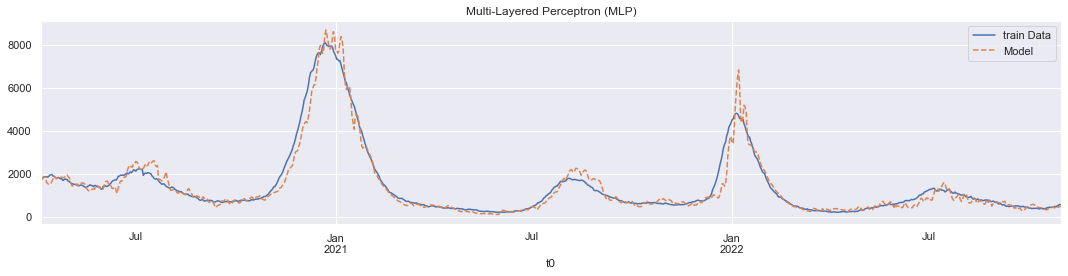

In [224]:
plt.figure(figsize=(15,4))
y_train.plot(label='train Data')
mlp_model_predict.plot(label = 'Model',style='--')

plt.title('Multi-Layered Perceptron (MLP)')
plt.legend()
plt.tight_layout()
plt.savefig('MLP DATAvsModel.png',dpi=900)

In [225]:
mlp_predict_test = pd.Series(mlp.predict(X_test),
                        index = test_period)
mlp_predict_predict = pd.Series(mlp.predict(X_predict),
                        index = predict_period)

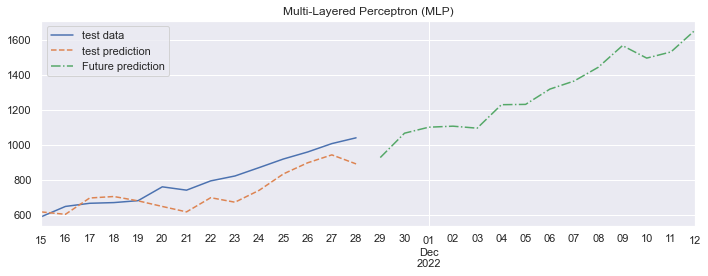

In [226]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
mlp_predict_test.plot(label='test prediction',style='--')
mlp_predict_predict.plot(label='Future prediction',style='-.')
plt.title('Multi-Layered Perceptron (MLP)')
plt.legend()
plt.tight_layout()
plt.savefig('MLP Test_Prediction.png',dpi=900)

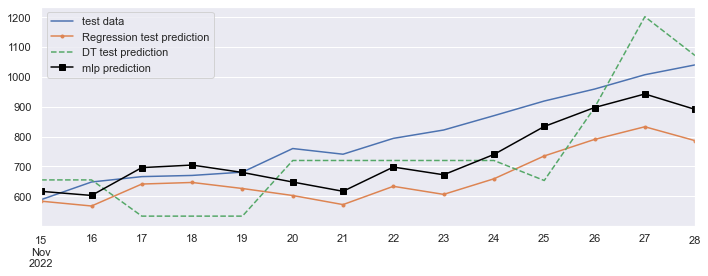

In [229]:
plt.figure(figsize=(10,4))
update_y_test.plot(label='test data')
predict_test.plot(label='Regression test prediction',style='.-')
dt_predict_test.plot(label='DT test prediction',style='--')
mlp_predict_test.plot(label='mlp prediction',c='black', style='bs-')


plt.legend()
plt.tight_layout()
plt.savefig('Compare Test_Prediction.png',dpi=900)